# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded in 2008 by Deepinder Goyal and Pankaj Chaddha. Zomato provides restaurant information, menus and user-reviews, and also offers food delivery options from partner restaurants in select cities. India is quite famous for the diverse multi-cuisine available in a large number of restaurants and hotel resorts, which reminds of unity in diversity. The restaurant business is growing significantly in India. Most Indians are loving the idea of eating restaurant food, whether it's eating out or ordering food. An increasing number of restaurants in every state of India are going to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. Therefore, this project focuses on analyzing Zomato restaurant data from each city in India.

This project focuses on customers and company, you have to analyze the sentiments of customer reviews in the data and draw some useful conclusions in the form of visualization. Apart from this, Zomato restaurants will also be grouped into different segments. Data is visualized because it becomes easier to analyze the data quickly. The analysis also solves some business cases which can directly help the customers to find the best restaurants in their locality and can help the company to move ahead and work on the areas in which they are currently lagging behind. It may help to divide the restaurant into sections. Additionally the data contains valuable information about dishes and costs that can be used in cost vs benefit analysis The data can be used for sentiment analysis. Additionally reviewers' metadata can be used to identify critics in the industry.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Manoharjha333/Zomato-Restaurant-Clustering-And-Sentiment-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

Zomato which is an Indian restaurant and food delivery start-up takes orders through online mode and delivers food items to people's doorsteps. We have some data of that which is from Hyderabad. In that data, we have to analyze it by applying the algorithm of Unsupervised ML, in which we have to understand the sentiments of the customers and based on the information about cuisine, cost and customer reviews, we have to find out whether the customers are trying to find the best restaurant in their area. That no. So that the company can be helped in development and improvement in the food industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***1. Know Your Data***

### Import Libraries

In [48]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [49]:
# Load Dataset

meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant reviews.csv')

### Dataset First View

In [50]:
# Dataset First Look
meta_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [51]:
meta_df.tail(5)

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [52]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [53]:
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
meta_df.shape

(105, 6)

In [55]:
review_df.shape

(10000, 7)

### Dataset Information

In [56]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [57]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [58]:
# Dataset Duplicate Value Count
len(meta_df[meta_df.duplicated()])

0

In [59]:
len(review_df[review_df.duplicated()])

36

#### Missing Values/Null Values

In [60]:
# Missing Values/Null Values Count
print(meta_df.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [61]:
print(review_df.isnull().sum())

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

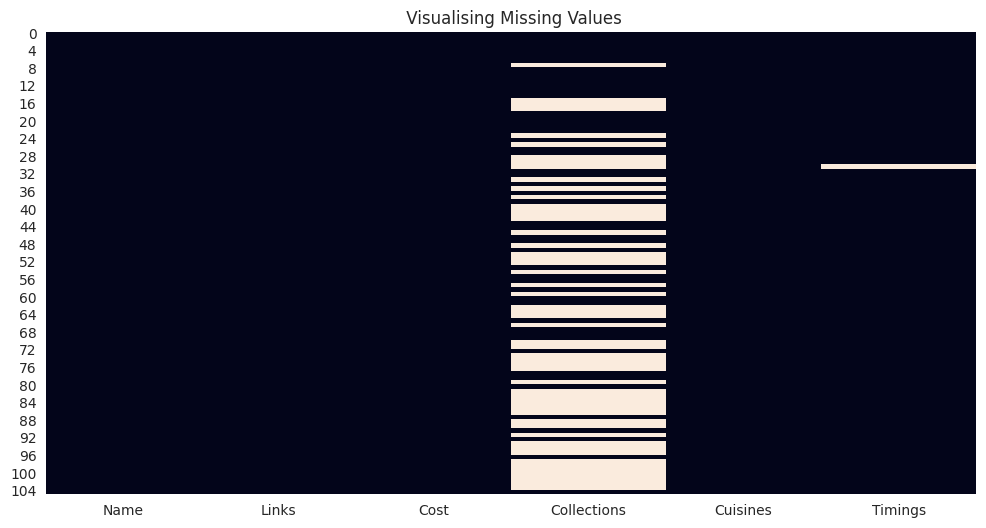

In [62]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(meta_df.isnull(), cbar=False)
plt.title(" Visualising Missing Values")

Text(0.5, 1.0, ' Visualising Missing Values')

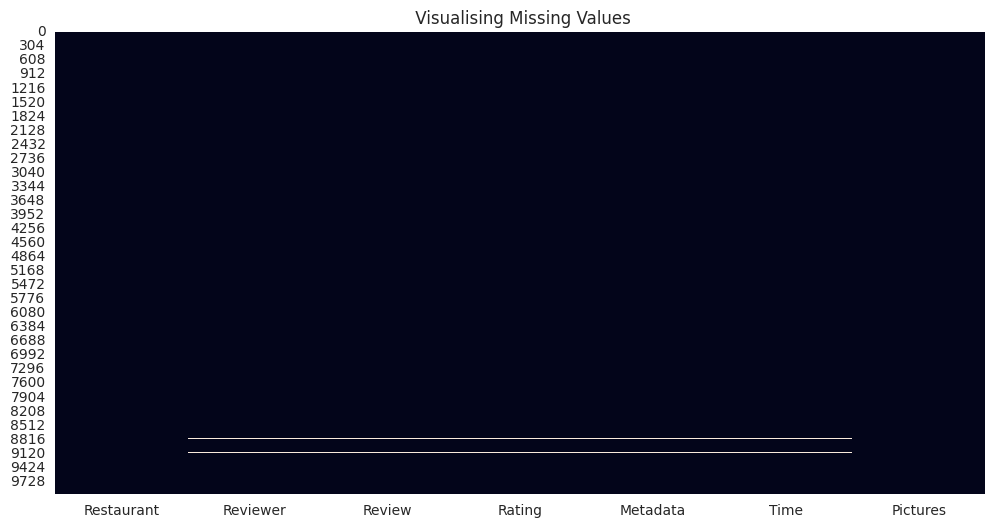

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(review_df.isnull(), cbar=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Answer Here

This is data from a Zomato restaurant, which has 10105 rows and 13 columns. In this, all the data comes in type object, only one is in int. 36 Duplicate Values in review dataset and both has missing values.

## ***2. Understanding Your Variables***

In [64]:
# Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [65]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [66]:
# Dataset Describe
meta_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [67]:
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

Answer Here

**<h3>Restaurant Data</h3>**


**Name:** Name of Restaurants

**Links URL:** Links of Restaurants

**Cost:** Per person estimated cost of dining

**Collection:** Tagging of Restaurants wrt. Zomato
categories

**Cuisines:** Cuisines served by restaurants

**Timings:** Restaurant timings
<br>
<br>

**<h3>Review Data**


**Reviewer:** Name of the reviewer

**review:** Review text

**Rating:** Rating provided

**MetaData:** Reviewer metadata-No of reviews and
followers

**Time:** Date and Time of Review

**Pictures:** No of pictures posted with review

### Check Unique Values for each variable.

In [68]:
# Check Unique Values for each variable.
meta_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [69]:
review_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [70]:
# Write your code to make your dataset analysis ready.

#creating copy of both the data
meta = meta_df.copy()
review = review_df.copy()

In [71]:
#cost checking values
meta['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [72]:
# changing the data type of the cost function
meta['Cost'] = meta['Cost'].str.replace(",","").astype('int64')

In [121]:
#count Rating
review_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [73]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [74]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [75]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [76]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [77]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [78]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [79]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [80]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [81]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [82]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [83]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [84]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [85]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [86]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [87]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [88]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [89]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [90]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [91]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [92]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [93]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [94]:
# Expand Contraction

#### 2. Lower Casing

In [95]:
# Lower Casing

#### 3. Removing Punctuations

In [96]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [97]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [98]:
# Remove Stopwords

In [99]:
# Remove White spaces

#### 6. Rephrase Text

In [100]:
# Rephrase Text

#### 7. Tokenization

In [101]:
# Tokenization

#### 8. Text Normalization

In [102]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [103]:
# POS Taging

#### 10. Text Vectorization

In [104]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [105]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [106]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [107]:
# Transform Your data

### 6. Data Scaling

In [108]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [109]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [110]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [111]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [112]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [113]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [114]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [115]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [117]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [118]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [119]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***